    Introduction to Forecasting Models - Exponenentail Model

In [220]:
import pandas as pd
import numpy as np

In [221]:
df = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\airline_passengers.csv')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [223]:
df['Month'] = pd.to_datetime(df['Month'])

In [224]:
df = df.set_index('Month')

In [225]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [226]:
train_data = df.iloc[:109]

In [227]:
test_data = df.iloc[108:]

In [228]:
test_data

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


In [229]:
train_data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-09-01,404
1957-10-01,347
1957-11-01,305


In [230]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [231]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit()

In [232]:
test_prediction = fitted_model.forecast(36)  # vary the number

In [233]:
test_prediction

1958-02-01    339.142929
1958-03-01    399.281670
1958-04-01    394.233619
1958-05-01    402.545275
1958-06-01    473.128728
1958-07-01    521.795288
1958-08-01    514.513579
1958-09-01    446.216813
1958-10-01    385.430963
1958-11-01    339.645115
1958-12-01    381.455698
1959-01-01    401.210195
1959-02-01    387.159205
1959-03-01    455.812464
1959-04-01    450.049704
1959-05-01    459.538134
1959-06-01    540.114880
1959-07-01    595.671712
1959-08-01    587.359050
1959-09-01    509.392742
1959-10-01    440.000757
1959-11-01    387.732492
1959-12-01    435.462668
1960-01-01    458.014032
1960-02-01    441.973686
1960-03-01    520.346958
1960-04-01    513.768299
1960-05-01    524.600113
1960-06-01    616.585015
1960-07-01    680.007652
1960-08-01    670.518073
1960-09-01    581.513199
1960-10-01    502.296610
1960-11-01    442.628139
1960-12-01    497.116013
1961-01-01    522.860226
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

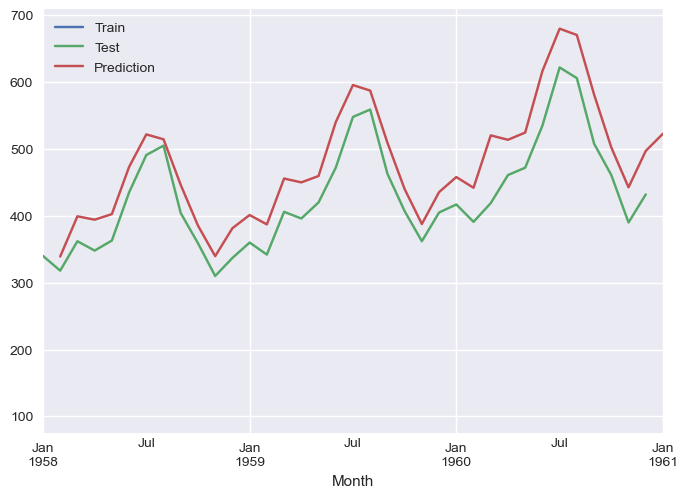

In [234]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_prediction.plot(legend =True, label = 'Prediction', xlim = ['1958-01-01', '1961-01-01'])

<Axes: xlabel='Month'>

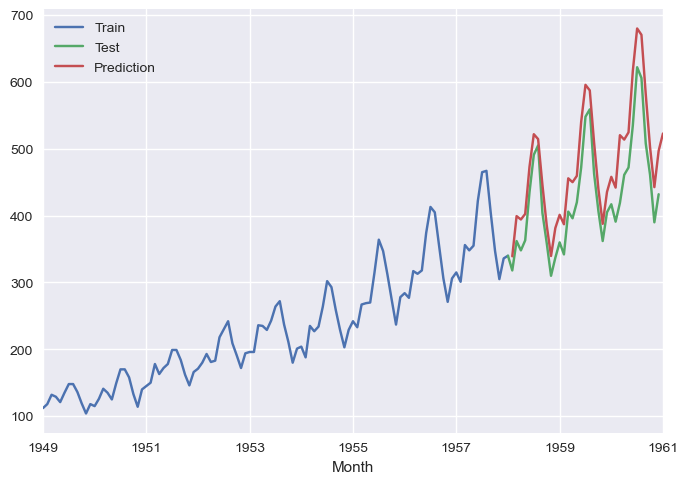

In [235]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_prediction.plot(legend =True, label = 'Prediction')

    Evaluating Forecast Predictions

In [236]:
test_prediction = fitted_model.forecast(36)  # vary the number multiple of 12, ex- 60,120

In [237]:
Predicted_Values = pd.DataFrame(test_prediction)

In [238]:
Predicted_Values = Predicted_Values.rename(columns={0: 'Predict Values'})

In [239]:
Predicted_Values.loc['1961-12-01' : ]

,Predict Values


In [240]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [241]:
mean_squared_error(test_data,test_prediction)

5614.266734155986

In [242]:
np.sqrt(mean_squared_error(test_data,test_prediction))

74.92841072754705

In [243]:
mean_absolute_error(test_data, test_prediction)

63.031171575091825

In [244]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [245]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'mul', seasonal= 'mul', seasonal_periods=12).fit()

In [246]:
forecast_predictions = final_model.forecast(36)

In [247]:
forecast_predictions

1961-01-01    450.676188
1961-02-01    424.819851
1961-03-01    475.498652
1961-04-01    504.076454
1961-05-01    517.873481
1961-06-01    590.148606
1961-07-01    684.229327
1961-08-01    678.033731
1961-09-01    567.113162
1961-10-01    507.823947
1961-11-01    434.719759
1961-12-01    485.981045
1962-01-01    502.747655
1962-02-01    473.903857
1962-03-01    530.438125
1962-04-01    562.317828
1962-05-01    577.708973
1962-06-01    658.334821
1962-07-01    763.285699
1962-08-01    756.374259
1962-09-01    632.637844
1962-10-01    566.498309
1962-11-01    484.947608
1962-12-01    542.131662
1963-01-01    560.835499
1963-02-01    528.659067
1963-03-01    591.725346
1963-04-01    627.288454
1963-05-01    644.457904
1963-06-01    734.399323
1963-07-01    851.476305
1963-08-01    843.766312
1963-09-01    705.733298
1963-10-01    631.951951
1963-11-01    540.978820
1963-12-01    604.769963
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

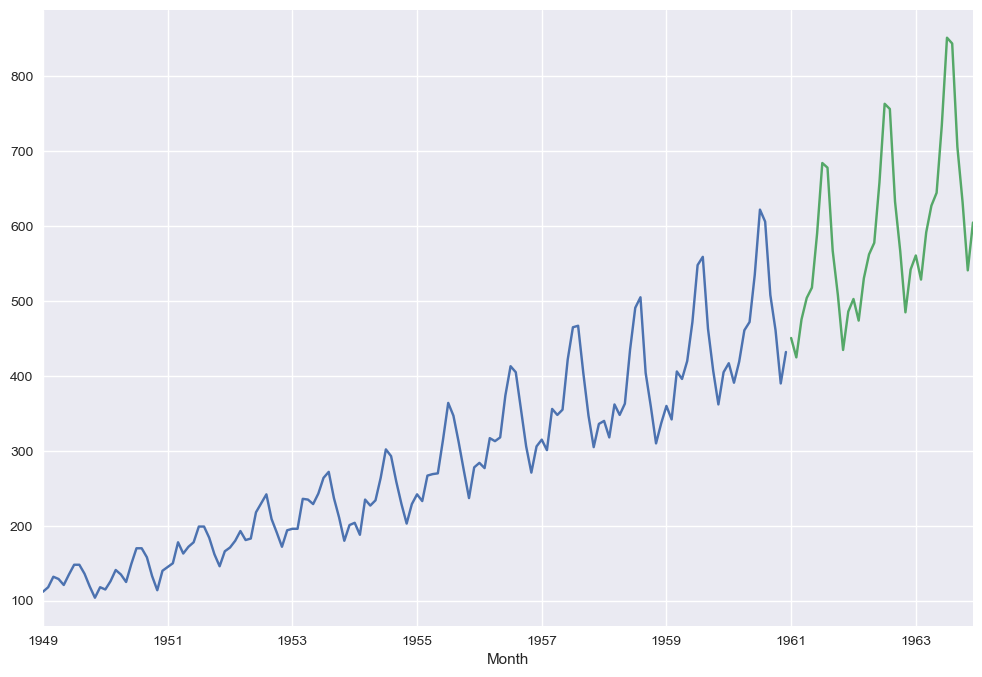

In [248]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

    Autoregression - AR with Statsmodels

In [249]:
 %matplotlib inline

In [250]:
df = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [251]:
df.head(13)

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
2011-06-01,311894
2011-07-01,312101
2011-08-01,312317
2011-09-01,312537


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [253]:
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


In [254]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg,ARResults
plt.style.use("seaborn")

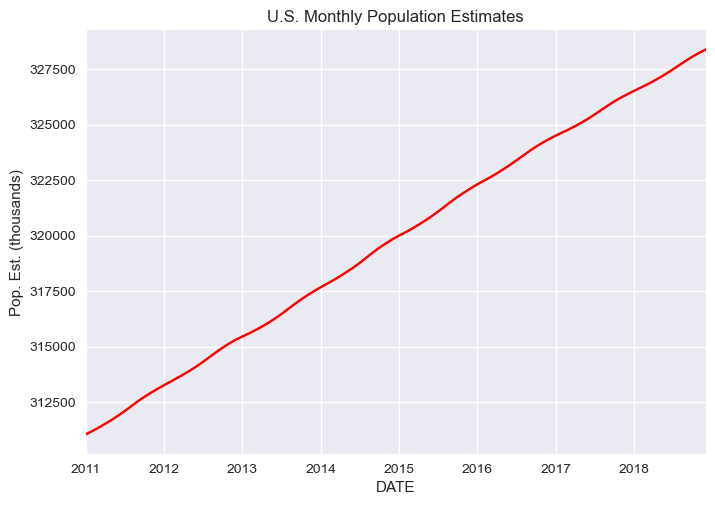

In [255]:
df['PopEst'].plot(kind= 'line', color = 'red', title = 'U.S. Monthly Population Estimates')
plt.ylabel('Pop. Est. (thousands)')
plt.show()

In [256]:
len(df)

96

In [257]:
train_data = df.iloc[:84]
test_data = df.iloc[84:]

In [258]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')


model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')


In [259]:
model = AutoReg(train_data['PopEst'], lags=1)
model_fit = model.fit()


In [260]:
model_fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [261]:
start = len(train_data)

In [262]:
end = len(train_data) + len(test_data)-1

In [263]:
end

95

In [264]:
start

84

In [265]:
Prediction1  = model_fit.predict(start=start, end=end)

In [266]:
Prediction1 = Prediction1.rename('AR(1) Predictions')

In [267]:
Prediction1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<Axes: xlabel='DATE'>

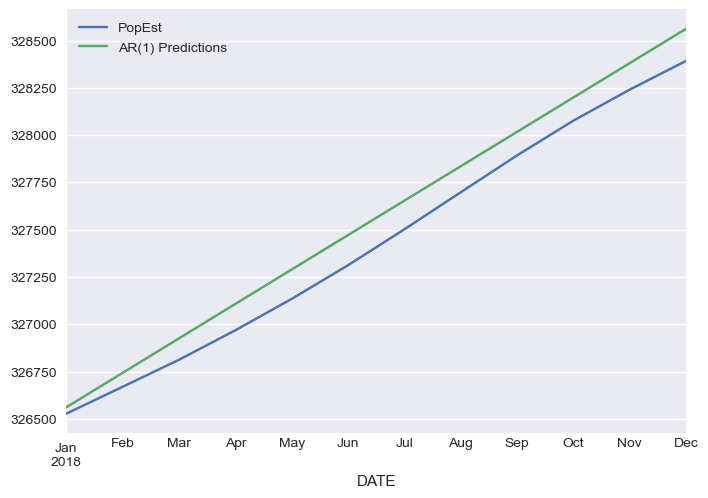

In [268]:
test_data.plot()
Prediction1.plot(legend = True)

In [269]:
AR2fit= AutoReg(train_data['PopEst'], lags=2).fit()


In [270]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [271]:
prediction2 = AR2fit.predict(start,end)

In [272]:
prediction2 = prediction2.rename('AR(2) Predictions')

<Axes: xlabel='DATE'>

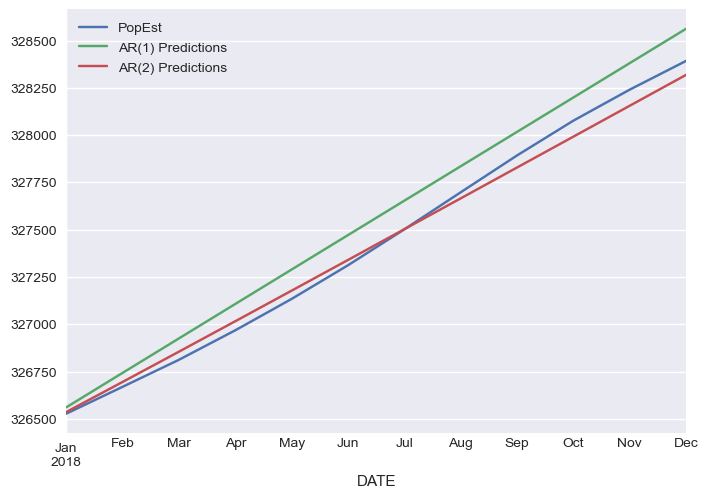

In [273]:
test_data.plot()
Prediction1.plot(legend = True)
prediction2.plot(legend = True)

In [274]:
AR8fit= AutoReg(train_data['PopEst'], lags=8).fit()


In [275]:
AR8fit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [276]:
prediction8 = AR8fit.predict(start, end)

In [277]:
prediction8 = prediction8.rename('AR(8) Predictions')

<Axes: xlabel='DATE'>

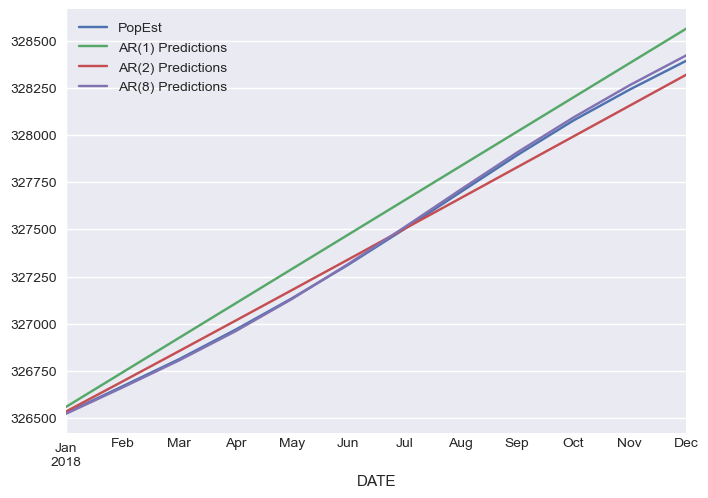

In [278]:
test_data.plot()
Prediction1.plot(legend = True)
prediction2.plot(legend = True)
prediction8.plot(legend = True)

In [281]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)', 'AR(2)', 'AR(8)']
preds = [Prediction1, prediction2, prediction8]

for i in range(3):
    error = mean_absolute_error(test_data['PopEst'], preds[i])
    print(f'{labels[i]} MSE: {error}')


AR(1) MSE: 126.75760458594111
AR(2) MSE: 44.79063616705631
AR(8) MSE: 11.248981975057783


<Axes: xlabel='DATE'>

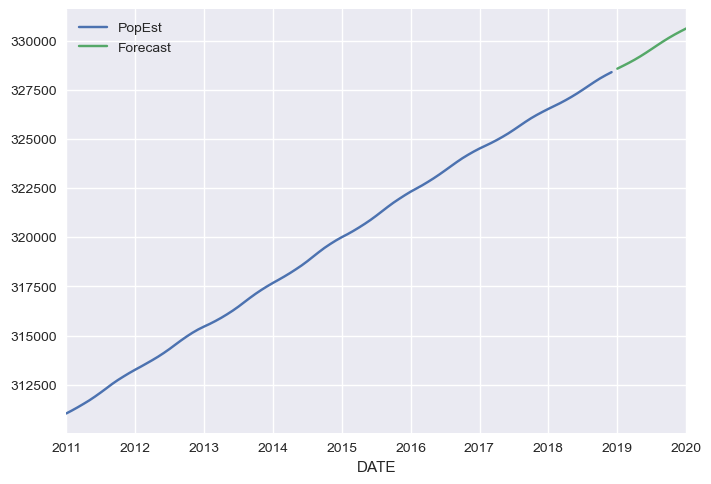

In [289]:
model = AutoReg(train_data['PopEst'], lags=8)
ARfit = model.fit()
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

df['PopEst'].plot(legend = True)
fcast.plot(legend = True)

    Descriptive Statistics and Tests - Part One